## __Exploratory Data Analysis Report:__
## __Diabetes Diagnostic Dataset__

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Gomycode\diabetes (1).csv")

In [5]:
print(df.info())
print("\nMissing / Zero Values per column:")
zero_counts = (df == 0).sum
print(zero_counts)

print("\nDescriptive Statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing / Zero Values per column:
<bound method DataFrame.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False     True  False   
1          False   

In [6]:
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

print("\nMissing Values (NaNs) After Zero Replacement:")
print(df.isna().sum())


Missing Values (NaNs) After Zero Replacement:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [7]:
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)


Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128135       0.214178       0.100239   
Glucose                      0.128135  1.000000       0.223192       0.228043   
BloodPressure                0.214178  0.223192       1.000000       0.226839   
SkinThickness                0.100239  0.228043       0.226839       1.000000   
Insulin                      0.082171  0.581186       0.098272       0.184888   
BMI                          0.021719  0.232771       0.289230       0.648214   
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805       0.115016   
Age                          0.544341  0.267136       0.330107       0.166816   
Outcome                      0.221898  0.494650       0.170589       0.259491   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.082171  0.021719                 -0.033523   
Glucose             

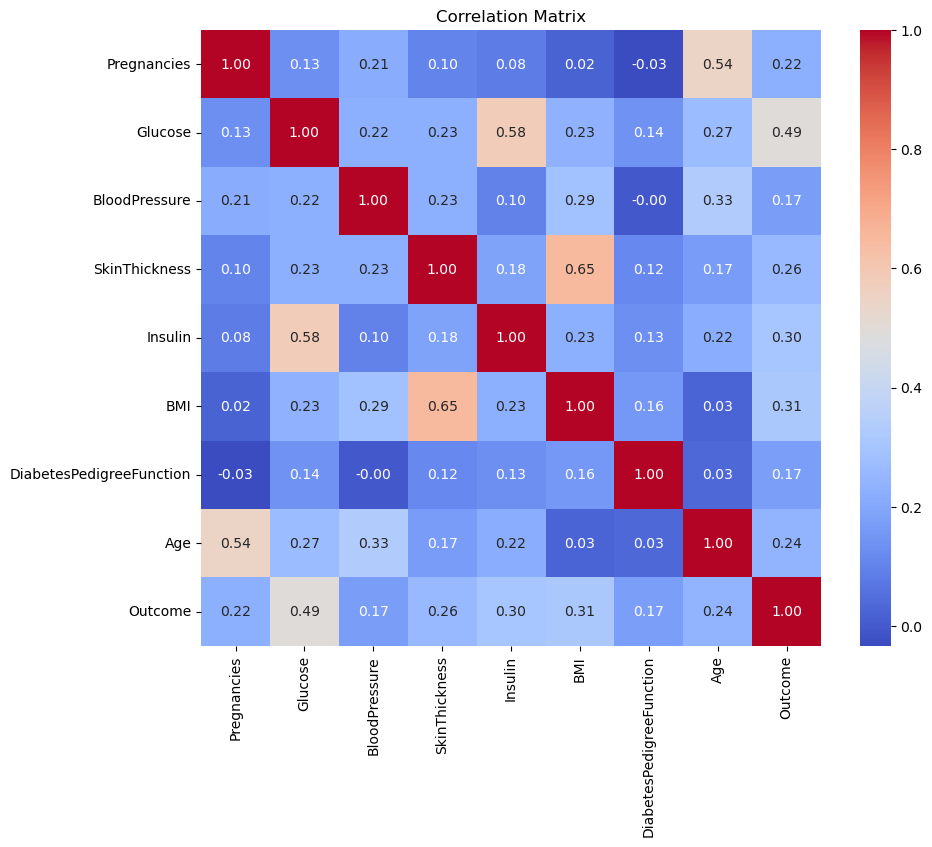

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

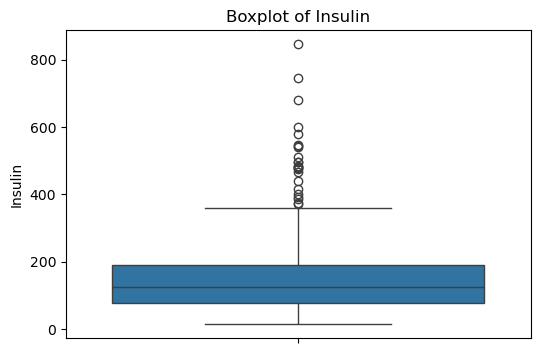

In [11]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y='Insulin')
plt.title("Boxplot of Insulin")
plt.show()           

In [15]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Diabetes Dataset Profiling Report", explorative=True)
profile.to_file("diabetes_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 112.39it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## __Summary__

- High prevalence of zero values in medically important fields, indicating missingness that must be addressed.

- Strong positive correlation between Glucose and diabetes diagnosis (Outcome).

- BMI and Age also show moderate positive correlation with outcome.

- Insulin levels are highly skewed with extreme outliers.

## __Recommendations__

- Missing Data Handling: Replace zeros in Glucose, BloodPressure, SkinThickness, Insulin, BMI with NaN and impute using appropriate methods          (mean/median or model-based imputation).

- Outlier Treatment: Cap extreme Insulin values or consider robust models.

- Feature Engineering: Consider binning Age or BMI into categories; create interaction terms (e.g., Glucose × BMI).

- Predictive Modeling: Use logistic regression or tree-based models to predict Outcome, evaluating performance via cross-validation.

- Further Analysis: Examine distributions by outcome class and test normalization or scaling.